<a href="https://colab.research.google.com/github/cheyoung211/2023-Spring-Maths-for-ML/blob/main/kNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#kNN Classification

##Drive Mount

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#cd /content/drive/MyDrive

##Import module

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Import Dataset

In [ ]:
URL = 'https://raw.githubusercontent.com/cheyoung211/2023-Spring-Maths-for-ML/main/fake_bills.csv'
df = pd.read_csv(URL, sep = ';')

In [ ]:
df.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [ ]:
df.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1463.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.485967     3.151473   
std       0.305195     0.299462      0.325627     0.663813     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.015000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

##One hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)

ohe.fit(df[['is_genuine']])

AA = ohe.transform(df[['is_genuine']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
AA = pd.DataFrame(AA)

In [ ]:
AA.head()

0    1
0  0.0  1.0
1  0.0  1.0
2  0.0  1.0
3  0.0  1.0
4  0.0  1.0

In [ ]:
AA = AA.drop([1],axis = 1)

In [ ]:
AA.head()

0
0  0.0
1  0.0
2  0.0
3  0.0
4  0.0

In [ ]:
df = df.drop(['is_genuine'],axis = 1)

In [ ]:
df.head()

diagonal  height_left  height_right  margin_low  margin_up  length
0    171.81       104.86        104.95        4.52       2.89  112.83
1    171.46       103.36        103.66        3.77       2.99  113.09
2    172.69       104.48        103.50        4.40       2.94  113.16
3    171.36       103.91        103.94        3.62       3.01  113.51
4    171.73       104.28        103.46        4.04       3.48  112.54

In [ ]:
df = pd.concat([AA,df], axis = 1)

In [ ]:
df.head()

0  diagonal  height_left  height_right  margin_low  margin_up  length
0  0.0    171.81       104.86        104.95        4.52       2.89  112.83
1  0.0    171.46       103.36        103.66        3.77       2.99  113.09
2  0.0    172.69       104.48        103.50        4.40       2.94  113.16
3  0.0    171.36       103.91        103.94        3.62       3.01  113.51
4  0.0    171.73       104.28        103.46        4.04       3.48  112.54

##Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   0             1500 non-null   float64
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(7)
memory usage: 82.2 KB


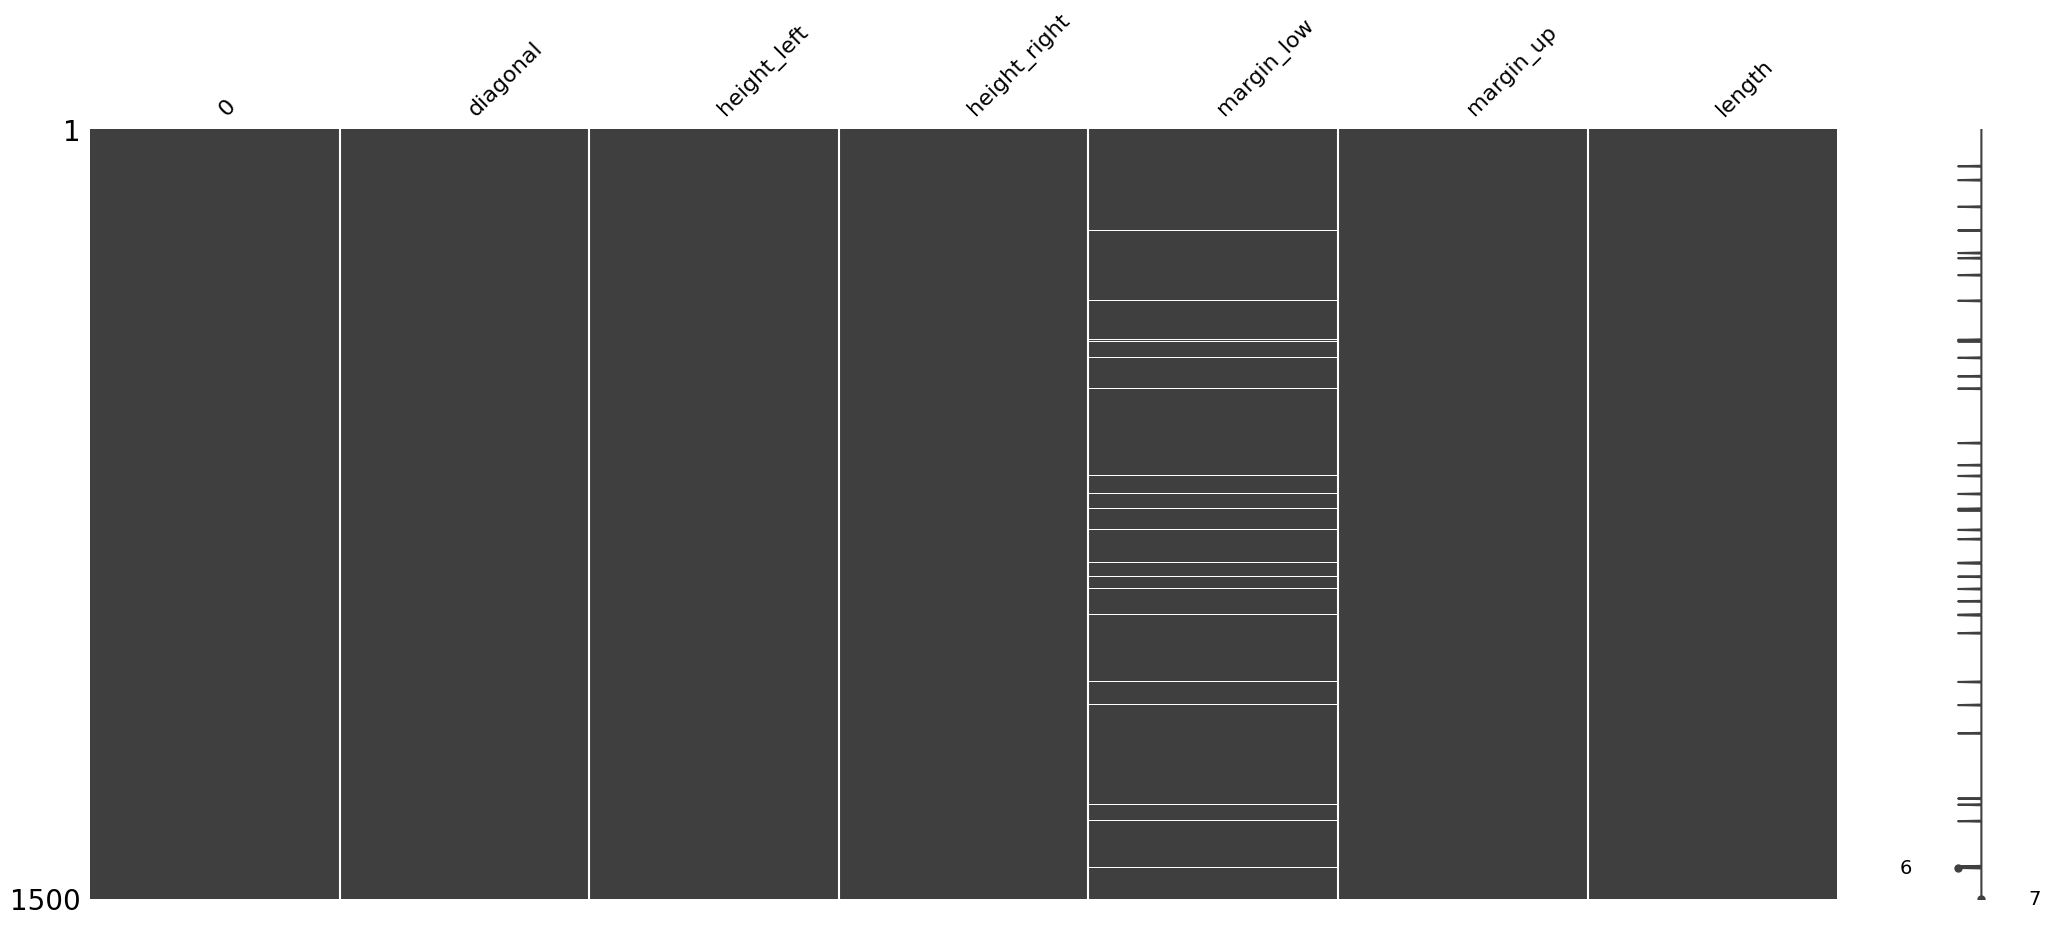

In [ ]:
msno.matrix(df)
plt.show()

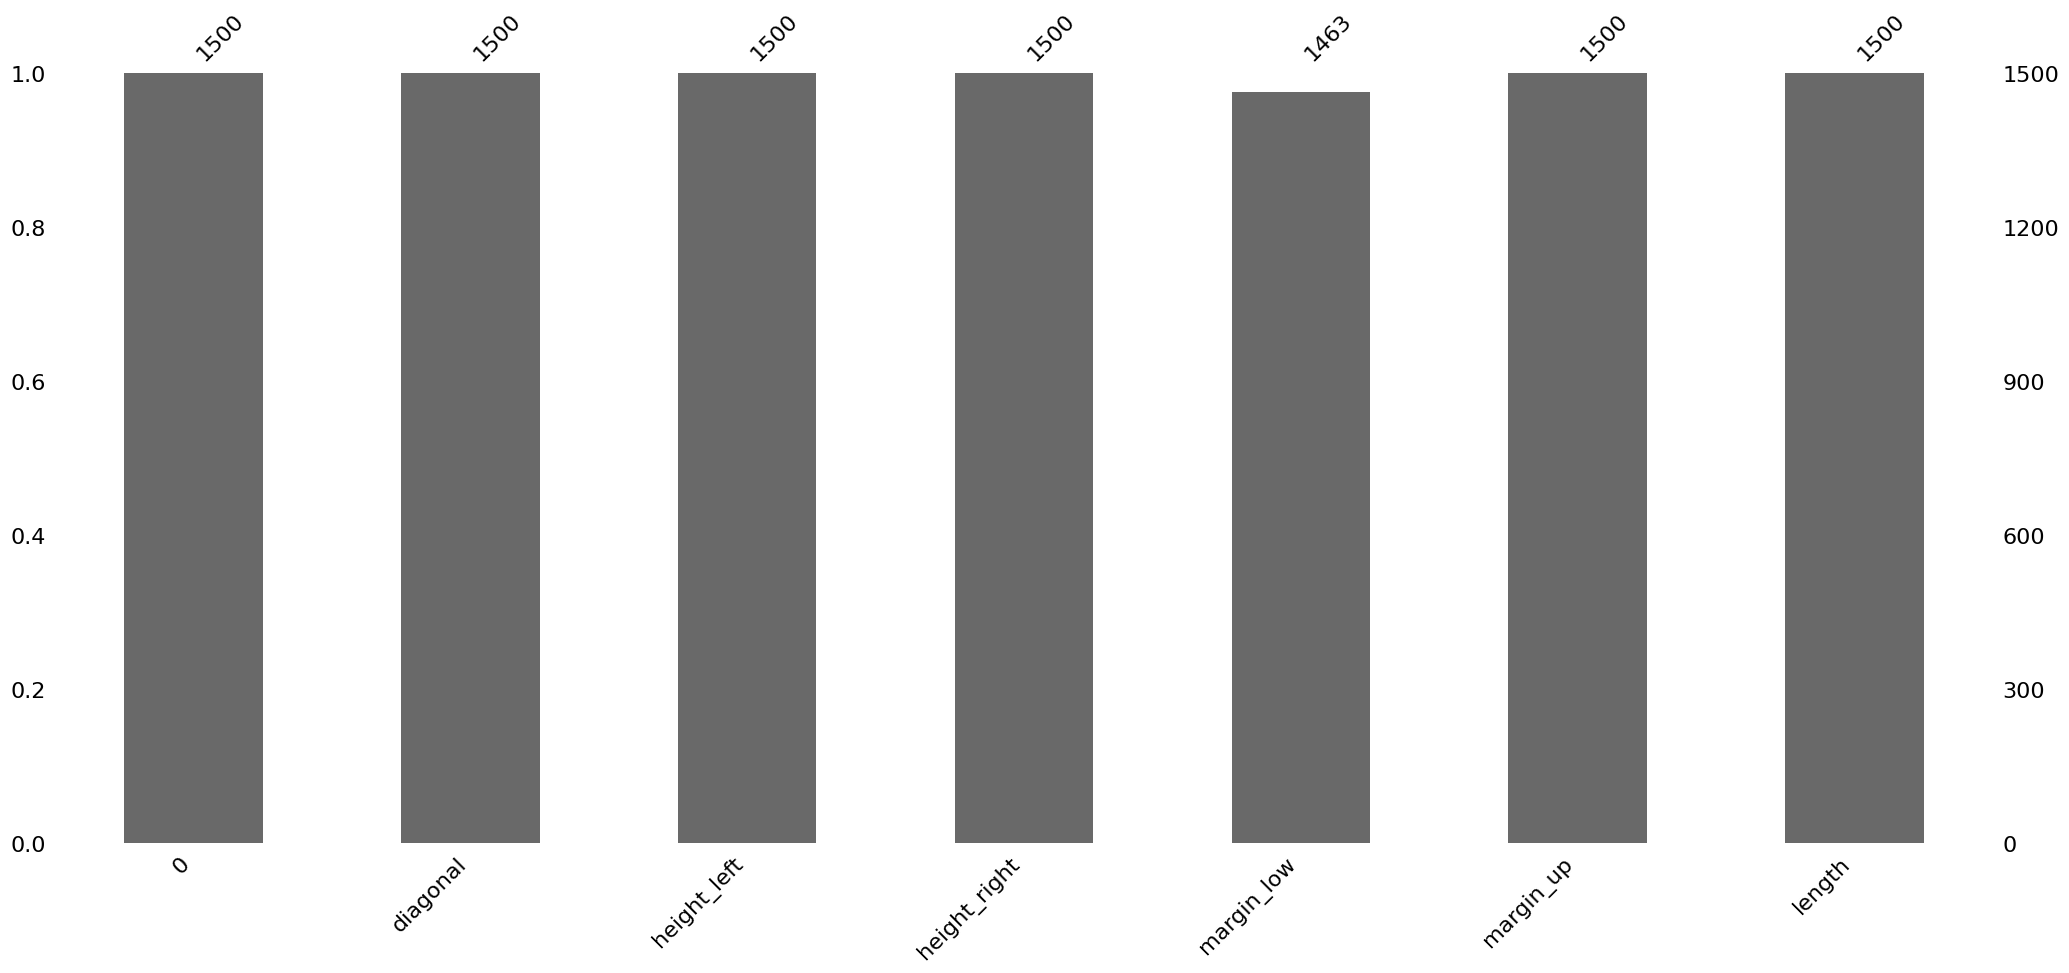

In [ ]:
msno.bar(df)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   0             1500 non-null   float64
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(7)
memory usage: 82.2 KB


In [ ]:
df.columns = df.columns.astype(str)

In [ ]:
df.head()

0  diagonal  height_left  height_right  margin_low  margin_up  length
0  0.0    171.81       104.86        104.95        4.52       2.89  112.83
1  0.0    171.46       103.36        103.66        3.77       2.99  113.09
2  0.0    172.69       104.48        103.50        4.40       2.94  113.16
3  0.0    171.36       103.91        103.94        3.62       3.01  113.51
4  0.0    171.73       104.28        103.46        4.04       3.48  112.54

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5)
df_imputed = imputer.fit_transform(df.iloc[:,0:])

In [ ]:
type(df_imputed)

numpy.ndarray

In [ ]:
df = pd.DataFrame(df_imputed)

In [ ]:
df.columns = ['is_genuine','diagonal','height_left','height_right','margin_low','margin_up','length']

In [ ]:
df.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0         0.0    171.81       104.86        104.95        4.52       2.89   
1         0.0    171.46       103.36        103.66        3.77       2.99   
2         0.0    172.69       104.48        103.50        4.40       2.94   
3         0.0    171.36       103.91        103.94        3.62       3.01   
4         0.0    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

##Data Distribution

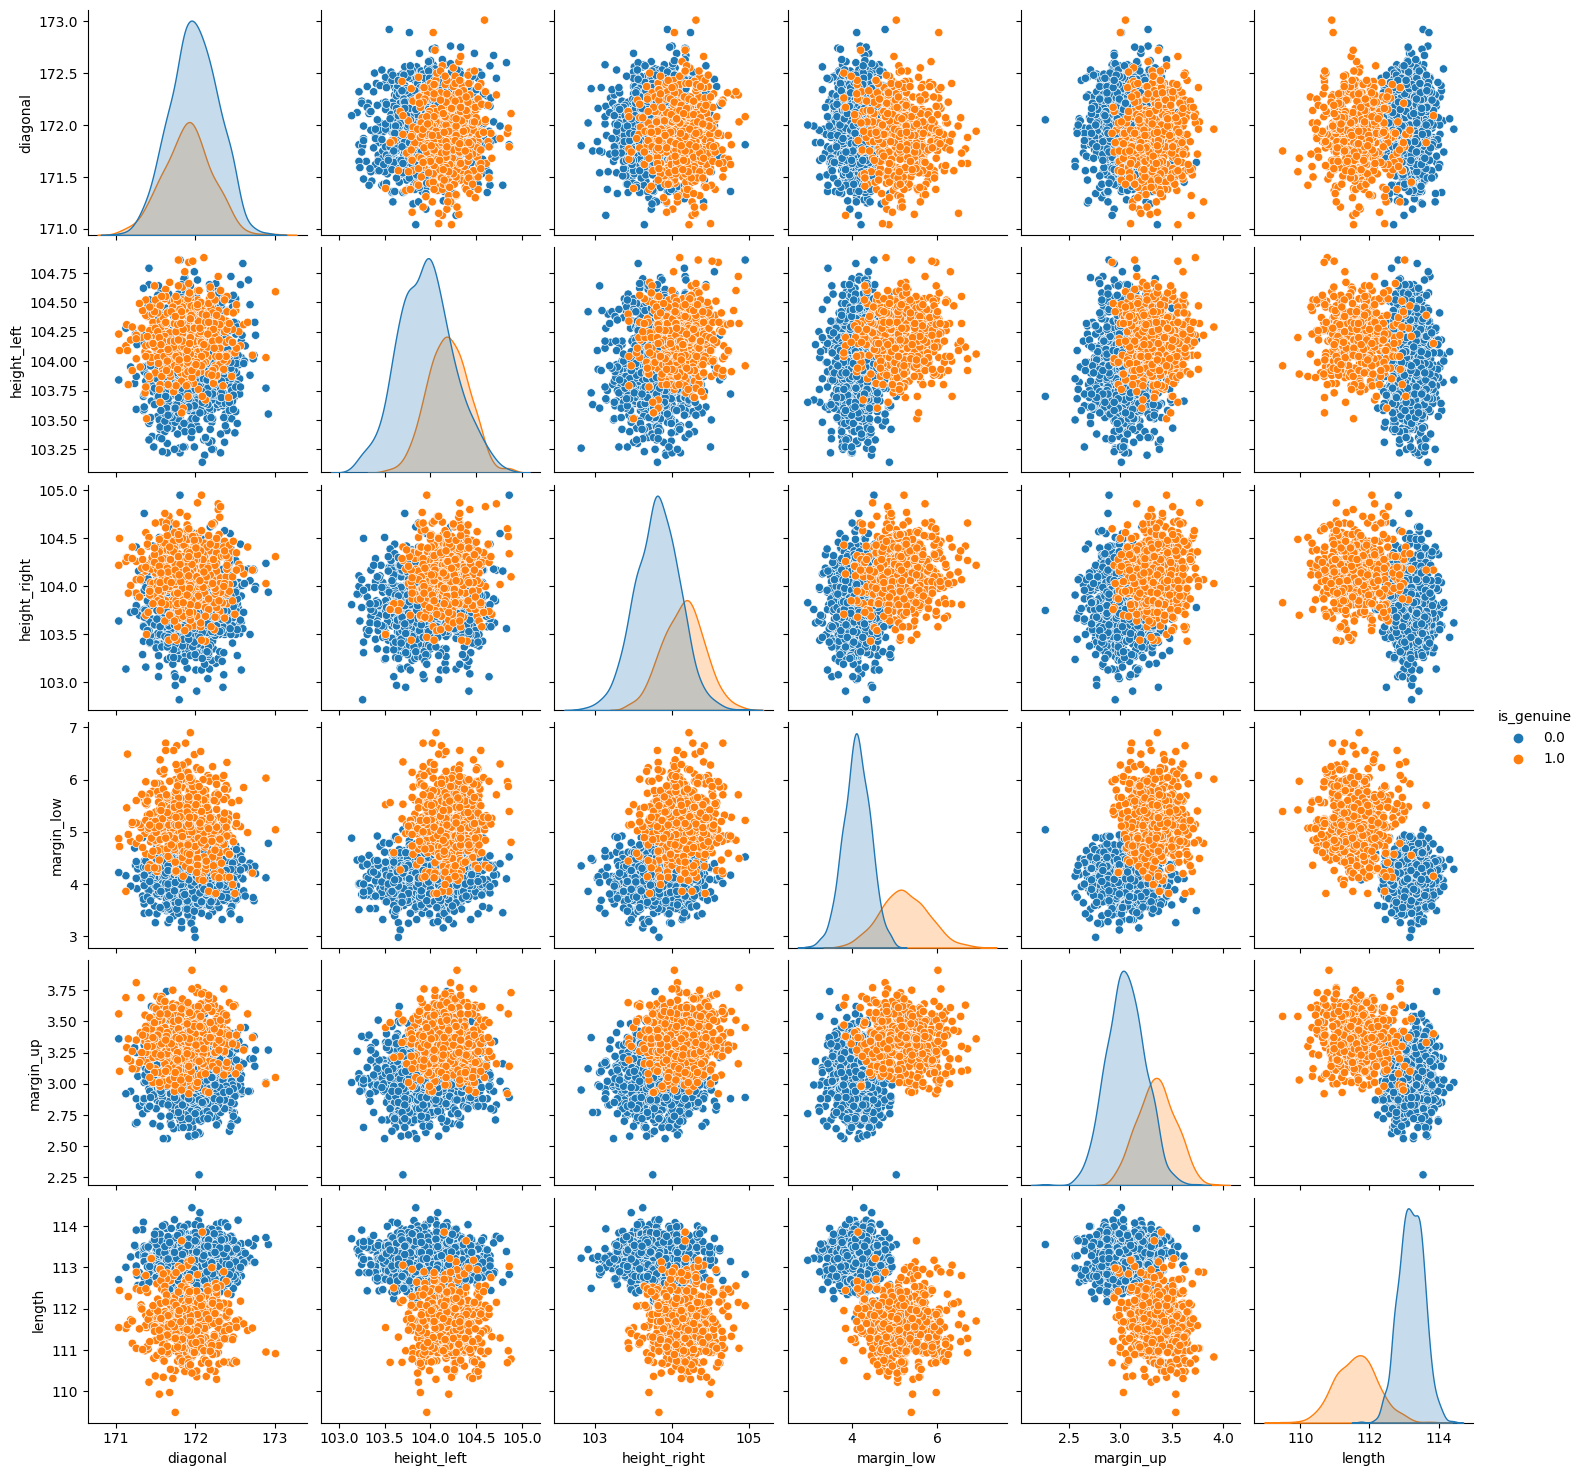

In [ ]:
sns.pairplot(df, hue = "is_genuine")
plt.show()

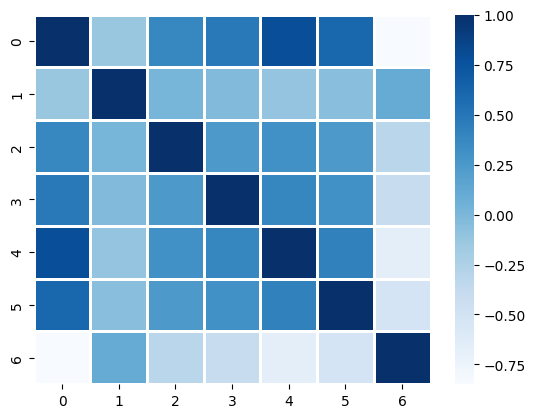

In [ ]:
corr_mat = np.corrcoef(df, rowvar = False)
sns.heatmap(corr_mat, linewidth = 1, cmap = 'Blues')
plt.show()

##Split dataset

In [ ]:
y_original = df.iloc[:,0:1]
y_original.head()

is_genuine
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,1:],y_original, stratify = y_original)

In [ ]:
x_train.head()

diagonal  height_left  height_right  margin_low  margin_up  length
796     171.64       103.75        104.17        4.17       2.98  113.14
1147    172.43       104.06        104.02        4.93       3.33  111.59
345     171.54       103.93        103.49        4.08       3.34  113.13
1001    171.92       103.86        104.30        4.96       3.13  111.29
223     171.97       104.05        103.82        4.09       2.88  112.67

In [ ]:
y_train.head()

is_genuine
796          0.0
1147         1.0
345          0.0
1001         1.0
223          0.0

##Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test_scale = scaler.transform(x_test)


In [ ]:
new_x_train = pd.DataFrame(x_train)
new_x_train.head()

0         1         2         3         4         5
0 -1.021098 -0.920619  0.785888 -0.462941 -0.725203  0.524509
1  1.576512  0.110819  0.318196  0.686000  0.792462 -1.233854
2 -1.349910 -0.321720 -1.334313 -0.599000  0.835824  0.513165
3 -0.100426 -0.554625  1.191220  0.731353 -0.074775 -1.574183
4  0.063979  0.077546 -0.305392 -0.583883 -1.158821 -0.008672

In [ ]:
x_test_scale = pd.DataFrame(x_test_scale)

##kNN executing

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10)

In [ ]:
knn.fit(new_x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.score(x_test_scale, y_test)

0.9866666666666667

##Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
knn_best = KNeighborsClassifier(metric = 'minkowski', n_neighbors = 10, weights = 'distance')
knn_best.fit(new_x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10, weights='distance')

In [ ]:
print('Test Accuracy : {}'.format(knn_best.score(x_test_scale,y_test)))

Test Accuracy : 0.992
